Phasor

In [60]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

1.ploting 할 때 쓰는 라이브러리 (중요)
2.

In [6]:
amp=1      #range[0.0,1.0]
sr=10000   #sampling rate,Hz
dur=0.5      #in seconds
freq=100.0   #sine frequency,Hz
#parameter setting

In [38]:
theta=np.arange(0,2*np.pi*5,0.1)   # generate phase
theta
#5번 돎

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [39]:
s=np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

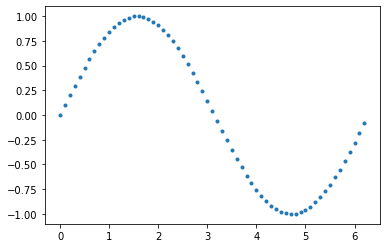

In [32]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(theta,s,'.')
#figure:화면 전체 

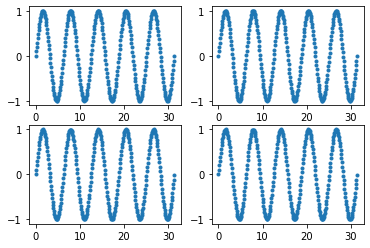

In [40]:
fig=plt.figure()
ax=fig.add_subplot(221)
ax.plot(theta,s,'.')
ax=fig.add_subplot(222)
ax.plot(theta,s,'.')
ax=fig.add_subplot(223)
ax.plot(theta,s,'.')
ax=fig.add_subplot(224)
ax.plot(theta,s,'.')

2X2 에 1 2 3 4는 배열 순서

t(time)을 만들면 0.0001 0.0002 0.0003....0.5000 까지 (sampling rate이 10000이니까
                                                        0.0001로 소수점을 맞추면 해상도 up)

In [20]:
t=np.arange(1,sr*dur+1)/sr #generate time (중요)


#1부터 5000까지 만들고 나누기 10000=만분의 일 만분의 이 만분의 삼초...

In [21]:
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

e-04=10의 4승 분의 일 즉 10000분의 1. 

In [45]:
theta=t*2*np.pi*freq   # generate phase 중요 :np안에있는pi를 불러와야하니까 np.pi
#frequency가 100이니까 2파이가 1초동안에 100개 (100바퀴) 있어야 함 

In [46]:
s=np.sin(theta) #generate signal by consine-phasor

Text(0, 0.5, 'real')

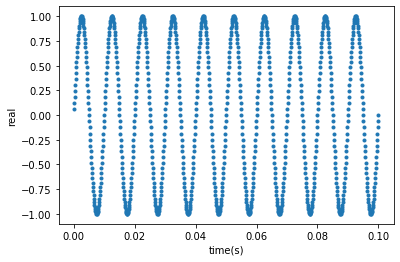

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000],s[0:1000], '.')
ax.set_xlabel('time(s)')
ax.set_ylabel('real')

위그래프에 있는 점의 개수는? 1000개

Text(0, 0.5, 'value')

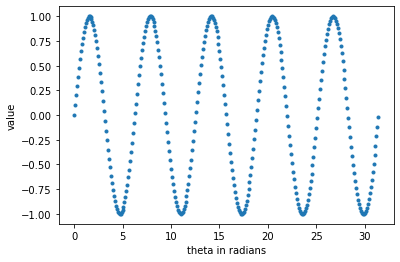

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')       #plot이라는 함수는 x와 y값을 필요로 함

Text(0, 0.5, 'value')

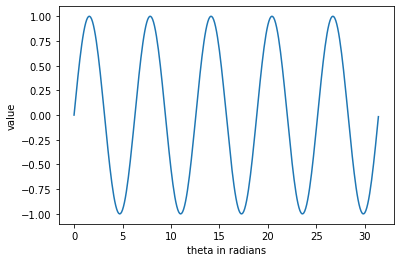

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '-')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [51]:
# generate signal by complex-phasor
c = np.exp(theta*1j)       
c

array([0.99802673+6.27905195e-02j, 0.9921147 +1.25333234e-01j,
       0.98228725+1.87381315e-01j, ..., 0.9921147 -1.25333234e-01j,
       0.99802673-6.27905195e-02j, 1.        +1.96438672e-15j])

np.exp=e. theta값만 바뀜 j=i

<IPython.core.display.Javascript object>


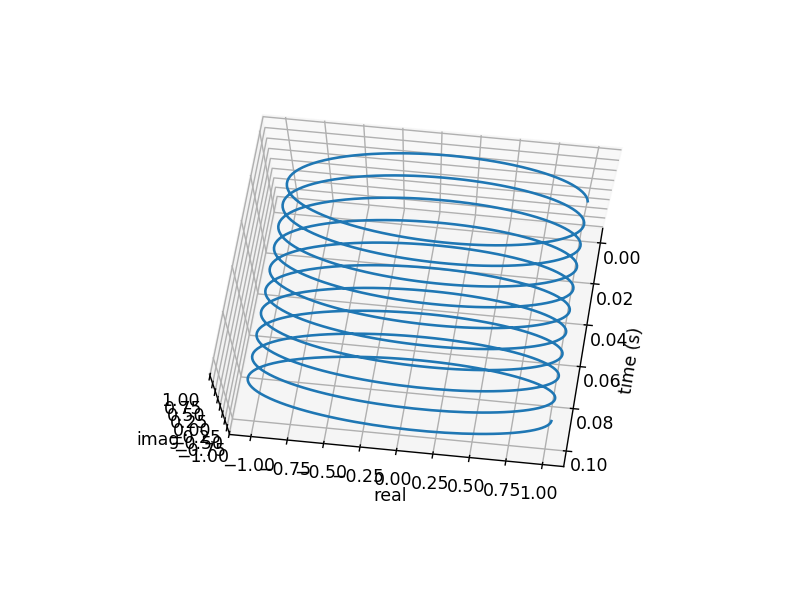

Text(0.5, 0, 'imag')

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '-')  #3차원벡터형성. 각각 세개의 점이 모여서 1000개씩
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

어느 축으로 맞추는지에 따라서 sine곡선이 나타나기도 하고 cosine곡선이 나오기도 함

In [62]:
ipd.Audio(c.real, rate=sr)